In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [2]:
# loading df
packages_st = pd.read_csv("../data/packages_st.csv")
packages_st.head()

,mean_age,total_pop,share_0to14,share_15to19,share_20to39,share_40to64,share_65to79,share_above80,share_foreigners,share_catholics,...,month_November,month_October,month_September,weekday_DI,weekday_DO,weekday_FR,weekday_MI,weekday_MO,weekday_SA,weekday_SO
0,-2.041805,-0.545104,2.232769,-0.205094,0.362606,-0.614213,-2.265277,0.025105,-1.137106,1.408947,...,0,0,0,1,0,0,0,0,0,0
1,-2.041805,-0.545104,2.232769,-0.205094,0.362606,-0.614213,-2.265277,0.025105,-1.137106,1.408947,...,0,0,0,0,1,0,0,0,0,0
2,-2.041805,-0.545104,2.232769,-0.205094,0.362606,-0.614213,-2.265277,0.025105,-1.137106,1.408947,...,0,0,0,0,0,1,0,0,0,0
3,-2.041805,-0.545104,2.232769,-0.205094,0.362606,-0.614213,-2.265277,0.025105,-1.137106,1.408947,...,0,0,0,0,0,0,1,0,0,0
4,-2.041805,-0.545104,2.232769,-0.205094,0.362606,-0.614213,-2.265277,0.025105,-1.137106,1.408947,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Split X and y: X dependent variables (features), y the traget variable
X = packages_st.drop("packages", axis=1)
y = packages_st["packages"]

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=72, shuffle=True)

In [4]:
# Different possibilites for number of trees
ntrees = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
# Instantiate lists to keep track of out-of-bag results
oob_mse = []
oob_mae = []

In [5]:
# forest growing
for trees in ntrees:
    # Instantiate the estimator
    forest = RandomForestRegressor(n_estimators=trees, ccp_alpha=0.01, 
                                   oob_score=True, warm_start=True, 
                                   random_state=144)
    # Fit the model
    forest.fit(Xtrain, ytrain)
    # Store the out-of-bag MSE and MAE. Notice how it is on the TRAIN set
    oob_mse.append(mse(ytrain, forest.oob_prediction_))
    oob_mae.append(mae(ytrain, forest.oob_prediction_))

Text(0.5, 0.95, 'RF: Number of trees')

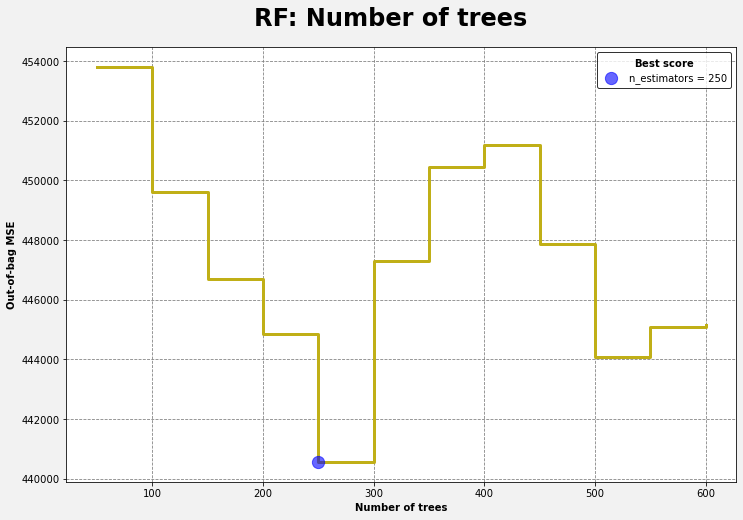

In [6]:
# visualize the results (plot the MSE)
fig, ax = plt.subplots(figsize=(12, 8), facecolor="#f2f2f2")
# Compute best MSE
best = np.argmin(oob_mse)
# Plot out-of-bag error
ax.step(ntrees, oob_mse, where="post", color="#c0af17", linewidth=3, zorder=1)
# Plot best
ax.scatter(ntrees[best], oob_mse[best], s=150, alpha=0.6, color="blue", label=f"n_estimators = {ntrees[best]}", zorder=2)
# Add axis labels, grid, legend
ax.set_xlabel("Number of trees", weight="bold")
ax.set_ylabel("Out-of-bag MSE", weight="bold")
ax.set_axisbelow(True)
ax.grid(linestyle="--", color="gray")
ax.legend(facecolor="white", edgecolor="black", title="$\\bf{Best\ score}$")
fig.suptitle("RF: Number of trees", weight="bold", fontsize=24, y=0.95)

# saving the visualazion
# plt.savefig('../rf_n_estimators.png', dpi=300, bbox_inches='tight')